In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("student_data.csv")
df.head(3)

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8


<AxesSubplot:xlabel='grade', ylabel='count'>

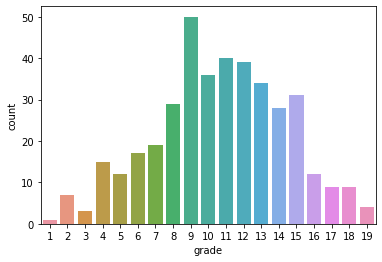

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='grade', data=df)

<AxesSubplot:>

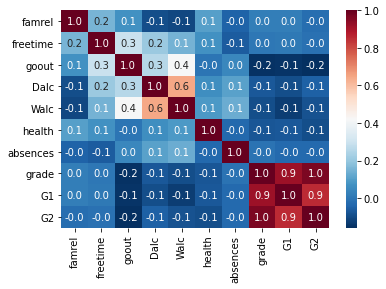

In [3]:
df_cor=df.corr(method='pearson')
sns.heatmap(df_cor, annot=True, fmt='.1f', cmap='RdBu_r')

다중공선성은 없다고 판단된다.

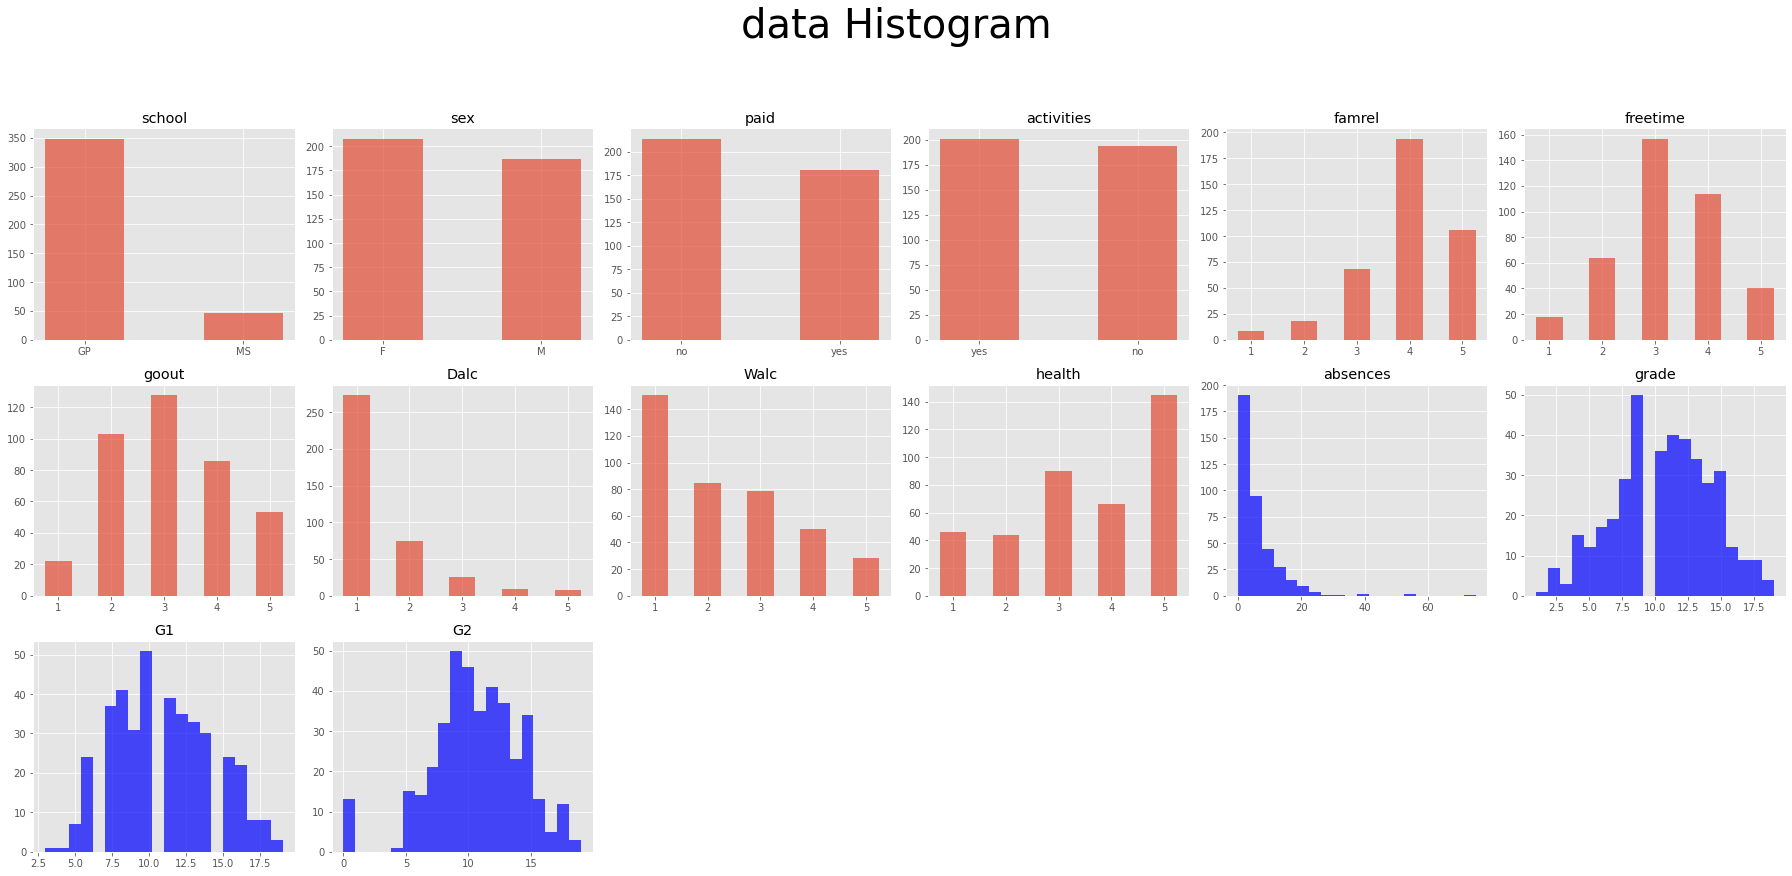

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(25,20))
plt.suptitle("data Histogram", fontsize=40)

cols=df.columns
for i in range(len(cols)):
    plt.subplot(5,6,i+1)
    plt.title(cols[i])
    if len(df[cols[i]].unique())>10:
        plt.hist(df[cols[i]], bins=20, color='b', alpha=0.7)
        
    else:
        temp=df[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [5]:
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

In [6]:
from sklearn.impute import KNNImputer

KNN_data=df.drop(columns=['school', 'sex', 'paid', 'activities'])

imputer=KNNImputer()
df_filled=imputer.fit_transform(KNN_data)
df_filled=pd.DataFrame(df_filled, columns=KNN_data.columns)
df[KNN_data.columns]=df_filled

df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

In [7]:
df=pd.get_dummies(df, drop_first=True)

In [8]:
df

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2,school_MS,sex_M,paid_yes,activities_yes
0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6.0,5.0,6.0,0,0,0,0
1,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,5.0,0,0,0,0
2,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8.0,7.0,8.0,0,0,1,0
3,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,15.0,14.0,0,0,1,1
4,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9.0,6.0,10.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0,9.0,1,1,1,0
391,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15.0,14.0,16.0,1,1,0,0
392,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8.0,10.0,8.0,1,1,0,0
393,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,11.0,12.0,1,1,0,0


In [9]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='grade')
y=df['grade']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=2022)

In [14]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

from sklearn.model_selection import GridSearchCV
param_grid=[{"C":[0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10]}]
grid_svm=GridSearchCV(SVR(), param_grid=param_grid, cv=5)
grid_svm.fit(X_train, y_train)
print(grid_svm.best_params_)

{'C': 100, 'gamma': 0.001}


In [15]:
svr=SVR(C=100, gamma=0.01)
svr.fit(X_train, y_train)
pred=svr.predict(X_test)
print(svr.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, pred)))

0.948612157348592
0.8516845430129286


In [19]:
rf_grid=[{'max_depth':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}]
rf=GridSearchCV(RandomForestRegressor(n_estimators=100), param_grid=rf_grid, cv=5)
rf.fit(X_train, y_train)
print(rf.best_params_)

{'max_depth': 8, 'min_samples_split': 4}


In [21]:
rf=RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_split=4)
rf.fit(X_train, y_train)
pred=rf.predict(X_test)
print(rf.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

0.9538023847908251
0.8075294156194809


In [ ]:
xgb_grid=[{'max_depth':[2,4,6,8,10]}]
xgb=GridSearchCV(XGBRegressor(n_estimators=1000), param_grid=xgb_grid, cv=5)
xgb.fit(X_train, y_train)
print(xgb.best_params_)

In [24]:
xgb=XGBRegressor(n_estimators=1000, param_grid=xgb_grid, cv=5)
xgb.fit(X_train, y_train)
pred=xgb.predict(X_test)
print(xgb.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, pred)))

[16:25:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "cv", "param_grid" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.95623420410882
0.785988130981762


xgb가 성능이 가장 좋았다

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

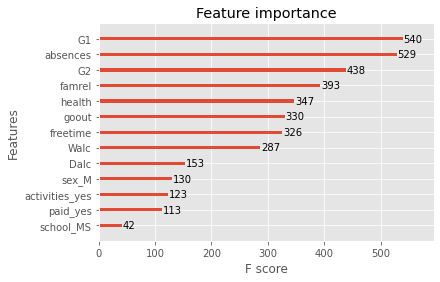

In [25]:
from xgboost import plot_importance

plot_importance(xgb)